In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

import seaborn as sns
from pylab import rcParams
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

In [53]:
from sklearn.metrics import f1_score

In [54]:
data = pd.read_csv('thesis-data.csv')
data

,Acc_X,Acc_Y,Acc_Z,Class
0,2.660984,-9.653030,0.470237,1
1,2.223091,2.223091,2.223091,1
2,2.098372,-9.481953,0.926070,1
3,2.716461,-9.739352,0.912008,1
4,2.288388,-9.371498,0.910390,1
...,...,...,...,...
155402,8.701128,4.238336,-0.194529,21
155403,8.680778,4.261679,-0.159214,21
155404,8.756194,4.168306,-0.144251,21
155405,8.662222,4.219781,-0.183755,21


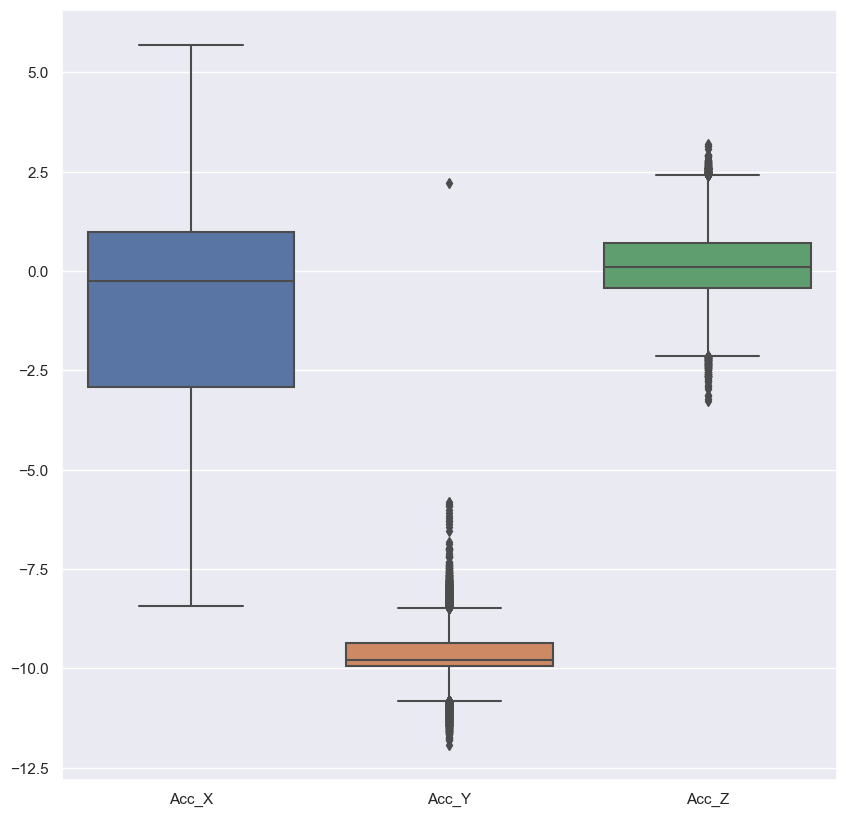

In [55]:
#boxplot for data with outliers
sns.set(rc={'figure.figsize':(10,10)})
fig= sns.boxplot(data=data.iloc[0:30000,0:3])
figure=fig.get_figure()

In [56]:
f=0
g=0
p=0

#finding first and last index of every class
ind=data.index.to_series().groupby(data['Class']).agg(['first','last']).reset_index()
print(ind)

    Class   first    last
0       1       0    7399
1       2    7400   14800
2       3   14801   22201
3       4   22202   29602
4       5   29603   37003
5       6   37004   44404
6       7   44405   51805
7       8   51806   59206
8       9   59207   66606
9      10   66607   74006
10     11   74007   81406
11     12   81407   88806
12     13   88807   96206
13     14   96207  103606
14     15  103607  110006
15     16  110007  118406
16     17  118407  125806
17     18  125807  133206
18     19  133207  140606
19     20  140607  148006
20     21  148007  155406


In [57]:
#detecting and replacing outliers by mean
for m in range(1,22):
    A = data.loc[data['Class'] == m]
    print(A.shape)
    first=ind.iloc[p,1]
    print(first)
    last=ind.iloc[p,2]
    print(last)
    for i in range(0,2):
        Avg= np.mean(A.iloc[:,i])
        #Avg
        Q1 = A.iloc[:,i].quantile(0.25)
        #Q1
        Q3 = A.iloc[:,i].quantile(0.75)
        #Q3
        IQR = Q3 - Q1
        #IQR
        lim1=(Q1 - 1.5 * IQR)
        #lim1
        lim2=(Q3 + 1.5 * IQR)
        #lim2       
        for ami in range(first,last+1):
            com=data.iloc[ami,i]
            if ((com < lim1) |(com > lim2)):
                data.iloc[ami,i] = Avg
                f=f+1
        print(f)
    if(p<21):
        p=p+1

(7400, 4)
0
7399
0
83
(7401, 4)
7400
14800
83
118
(7401, 4)
14801
22201
118
320
(7401, 4)
22202
29602
576
1528
(7401, 4)
29603
37003
1528
1528
(7401, 4)
37004
44404
1528
1528
(7401, 4)
44405
51805
1528
1528
(7401, 4)
51806
59206
2357
2380
(7400, 4)
59207
66606
2689
2753
(7400, 4)
66607
74006
2871
2871
(7400, 4)
74007
81406
2871
3180
(7400, 4)
81407
88806
3313
3458
(7400, 4)
88807
96206
3897
3897
(7400, 4)
96207
103606
3897
3946
(6400, 4)
103607
110006
5431
5431
(8400, 4)
110007
118406
5431
5431
(7400, 4)
118407
125806
6579
6579
(7400, 4)
125807
133206
6585
6585
(7400, 4)
133207
140606
6585
6585
(7400, 4)
140607
148006
6714
6792
(7400, 4)
148007
155406
6792
6792


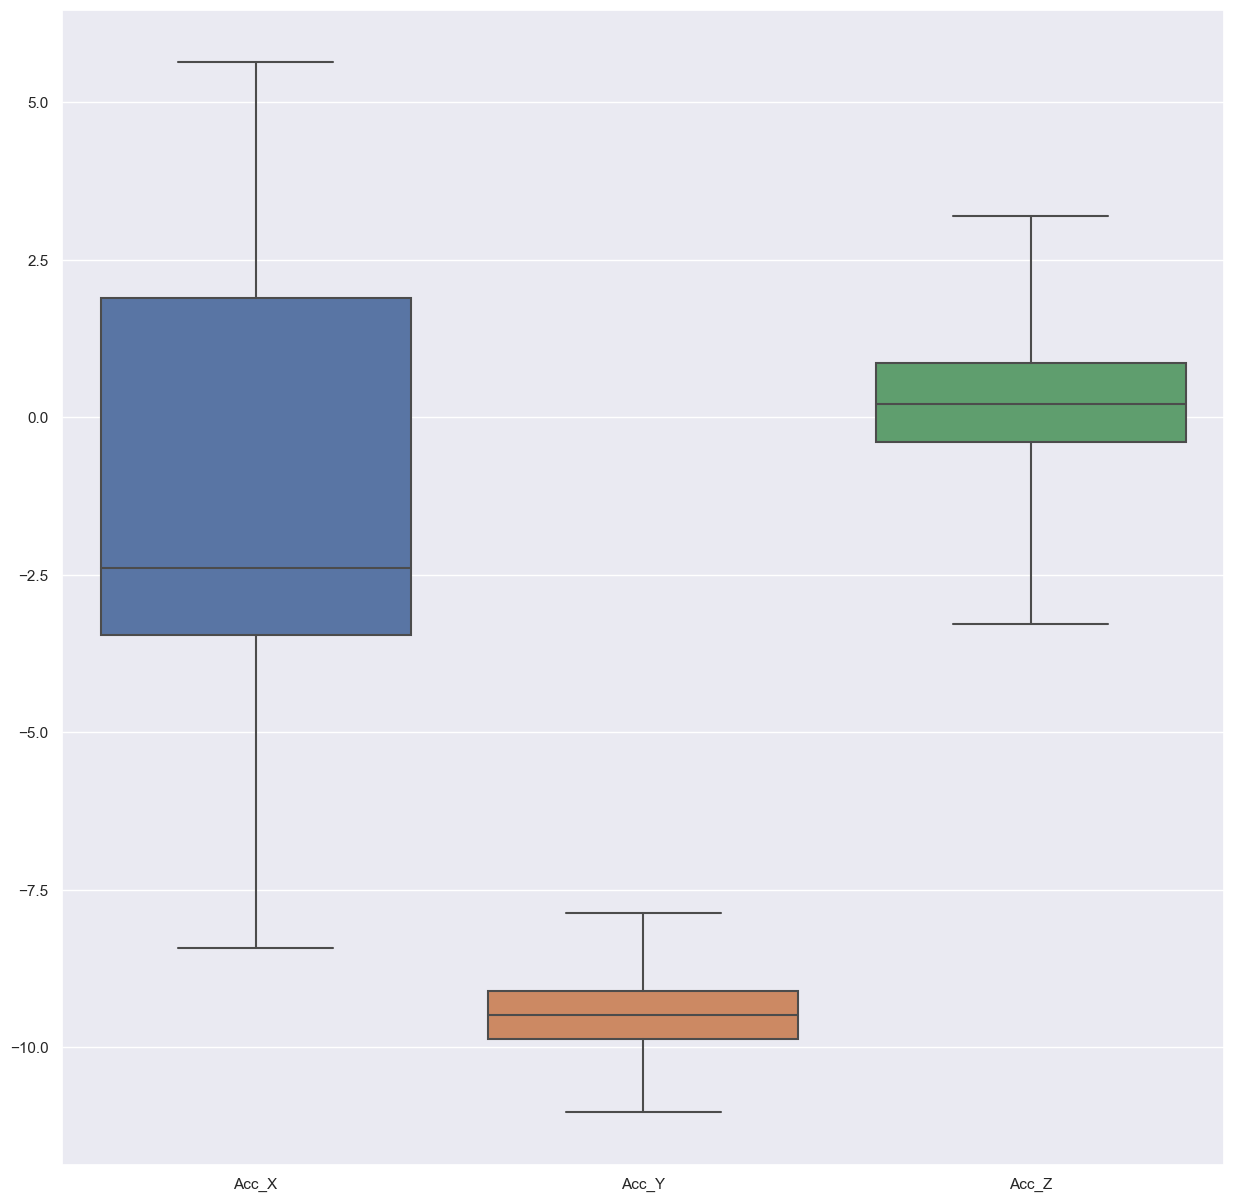

In [58]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(15,15)})
fig=sns.boxplot(data=data.iloc[0:8000,0:3],whis=[0, 100])
count=0
figure=fig.get_figure()

In [59]:
data.to_csv('no-outlier.csv')

In [60]:
balanced_data = pd.read_csv('no-outlier.csv')
balanced_data

,Unnamed: 0,Acc_X,Acc_Y,Acc_Z,Class
0,0,2.660984,-9.653030,0.470237,1
1,1,2.223091,-9.432167,2.223091,1
2,2,2.098372,-9.481953,0.926070,1
3,3,2.716461,-9.739352,0.912008,1
4,4,2.288388,-9.371498,0.910390,1
...,...,...,...,...,...
155402,155402,8.701128,4.238336,-0.194529,21
155403,155403,8.680778,4.261679,-0.159214,21
155404,155404,8.756194,4.168306,-0.144251,21
155405,155405,8.662222,4.219781,-0.183755,21


In [61]:
label = LabelEncoder()
balanced_data['label'] = label.fit_transform(balanced_data['Class'])
balanced_data

,Unnamed: 0,Acc_X,Acc_Y,Acc_Z,Class,label
0,0,2.660984,-9.653030,0.470237,1,0
1,1,2.223091,-9.432167,2.223091,1,0
2,2,2.098372,-9.481953,0.926070,1,0
3,3,2.716461,-9.739352,0.912008,1,0
4,4,2.288388,-9.371498,0.910390,1,0
...,...,...,...,...,...,...
155402,155402,8.701128,4.238336,-0.194529,21,20
155403,155403,8.680778,4.261679,-0.159214,21,20
155404,155404,8.756194,4.168306,-0.144251,21,20
155405,155405,8.662222,4.219781,-0.183755,21,20


In [62]:
dfn = balanced_data.drop('Unnamed: 0', axis=1)  
dfn

,Acc_X,Acc_Y,Acc_Z,Class,label
0,2.660984,-9.653030,0.470237,1,0
1,2.223091,-9.432167,2.223091,1,0
2,2.098372,-9.481953,0.926070,1,0
3,2.716461,-9.739352,0.912008,1,0
4,2.288388,-9.371498,0.910390,1,0
...,...,...,...,...,...
155402,8.701128,4.238336,-0.194529,21,20
155403,8.680778,4.261679,-0.159214,21,20
155404,8.756194,4.168306,-0.144251,21,20
155405,8.662222,4.219781,-0.183755,21,20


In [63]:
label.classes_

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21], dtype=int64)

In [64]:
X = dfn[['Acc_X', 'Acc_Y', 'Acc_Z']]
y = dfn['label']

In [65]:
X

,Acc_X,Acc_Y,Acc_Z
0,2.660984,-9.653030,0.470237
1,2.223091,-9.432167,2.223091
2,2.098372,-9.481953,0.926070
3,2.716461,-9.739352,0.912008
4,2.288388,-9.371498,0.910390
...,...,...,...
155402,8.701128,4.238336,-0.194529
155403,8.680778,4.261679,-0.159214
155404,8.756194,4.168306,-0.144251
155405,8.662222,4.219781,-0.183755


In [66]:
y

0          0
1          0
2          0
3          0
4          0
          ..
155402    20
155403    20
155404    20
155405    20
155406    20
Name: label, Length: 155407, dtype: int64

In [67]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['Acc_X', 'Acc_Y', 'Acc_Z'])
scaled_X['mag'] = np.sqrt(scaled_X['Acc_X'] ** 2 + scaled_X['Acc_Y'] ** 2 + scaled_X['Acc_Z'] ** 2)
scaled_X['label'] = y.values

scaled_X.head()

,Acc_X,Acc_Y,Acc_Z,mag,label
0,0.985481,-0.807007,-0.491449,1.365267,0
1,0.865844,-0.763546,-0.059973,1.155978,0
2,0.831769,-0.773343,-0.379243,1.197382,0
3,1.000638,-0.823993,-0.382704,1.351556,0
4,0.883684,-0.751608,-0.383103,1.221712,0


In [68]:
scaled_X = scaled_X.drop(['Acc_X', 'Acc_Y', 'Acc_Z'], axis=1)


In [69]:
scaled_X

,mag,label
0,1.365267,0
1,1.155978,0
2,1.197382,0
3,1.351556,0
4,1.221712,0
...,...,...
155402,3.329777,20
155403,3.326341,20
155404,3.331364,20
155405,3.318731,20


In [70]:
import scipy.stats as stats


In [111]:
Fs = 20
frame_size = Fs * 10
hop_size = Fs * 5

In [112]:
frames = []
labels = []

In [113]:
for i in range(0, len(scaled_X) - frame_size, hop_size):
    x = scaled_X['mag'].values[i: i + frame_size]
    label = stats.mode(scaled_X['label'][i: i + frame_size])[0][0]
    frames.append([x])
    labels.append(label)




C:\Users\Acer Nitro 5\AppData\Local\Temp\ipykernel_9376\3385155099.py:3: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = stats.mode(scaled_X['label'][i: i + frame_size])[0][0]


In [114]:
frames

[[array([1.36526721, 1.15597789, 1.1973823 , 1.35155561, 1.22171154,
         1.39998588, 1.24071948, 1.44282169, 1.18424158, 1.47995624,
         1.33718999, 1.40314429, 1.35352911, 1.39702549, 1.16965787,
         1.49829438, 1.25160314, 1.44631265, 1.26914888, 1.46394115,
         1.20315026, 1.49816562, 1.35350222, 1.30552018, 1.38081524,
         1.2409114 , 1.49620597, 1.22962723, 1.38606102, 1.28693125,
         1.50836541, 1.20397838, 1.41279747, 1.27277002, 1.43521593,
         1.20089205, 1.48315232, 1.21451801, 1.49481517, 1.16056979,
         1.49539754, 1.17207398, 1.52684904, 1.11141564, 1.52182865,
         1.1919541 , 1.44713669, 1.09060842, 1.51547038, 1.26043368,
         1.42098619, 1.41965769, 1.28338006, 1.37563355, 1.25026159,
         1.4652691 , 1.17792881, 1.48747907, 1.09995597, 1.4949436 ,
         1.16584162, 1.48534913, 1.16718812, 1.49364594, 1.03913124,
         1.51235424, 1.1549825 , 1.4917784 , 1.21352015, 1.4716492 ,
         1.29954556, 1.42716638, 1

In [115]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,


In [116]:
frames = np.asarray(frames).reshape(-1, frame_size)
labels = np.asarray(labels)

In [117]:
print("RESHAPE SHAPE: ",frames.shape)
print("LABELS: ",labels[0])
print("LABELS: ",labels.shape)

RESHAPE SHAPE:  (1553, 200)
LABELS:  0
LABELS:  (1553,)


In [118]:
x=frames
y=labels

In [119]:
from sklearn.model_selection import train_test_split


In [120]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=123, stratify=y)


In [121]:
training_files=[x_train, y_train]
subject_files=[x_test, y_test]

In [122]:
class ProgressMeter(object):
    def __init__(self, num_batches, *meters, prefix=""):
        self.batch_fmtstr = self._get_batch_fmtstr(num_batches)
        self.meters = meters
        self.prefix = prefix

    def print(self, batch):
        entries = [self.prefix + self.batch_fmtstr.format(batch)]
        entries += [str(meter) for meter in self.meters]
        print('\t'.join(entries))

    def _get_batch_fmtstr(self, num_batches):
        num_digits = len(str(num_batches // 1))
        fmt = '{:' + str(num_digits) + 'd}'
        return '[' + fmt + '/' + fmt.format(num_batches) + ']'


In [123]:
import torch
from torch.utils.data import Dataset


class LoadDataset_from_numpy(Dataset):
    def __init__(self, np_data):
        super(LoadDataset_from_numpy, self).__init__()
        X_train = np_data[0]
        y_train = np_data[1]
        self.len = X_train.shape[0]
        self.x_data = torch.from_numpy(X_train).float()
        self.y_data = torch.from_numpy(y_train).long()
        self.x_data = self.x_data.view(self.x_data.size()[0], 1, self.x_data.size()[1])

    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    def __len__(self):
        return self.len


def data_generator_np(training_files, subject_files, batch_size):
    train_dataset = LoadDataset_from_numpy(training_files)
    test_dataset = LoadDataset_from_numpy(subject_files)

    train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                               batch_size=batch_size,
                                               shuffle=True,
                                               drop_last=True,
                                               num_workers=0)

    test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                              batch_size=batch_size,
                                              shuffle=False,
                                              drop_last=True,
                                              num_workers=0)

    return train_loader, test_loader

In [124]:
train_loader, test_loader = data_generator_np(training_files, subject_files, 128)


In [125]:
import torch.nn as nn
from torch.nn import functional as f

"""
2.1  Signal Segments Representation

Signal Segment Definition: class SignalSegmentDefinition(nn.Module)
Signal Segment Representation: class SignalSegmentRepresentation(nn.Module)

2.2 Relationship Learning

2.2.1 Global Node Attention: class GNA(nn.Module):

***
(1) Signal Segment Definition -> (2) Signal Segment Representation -> (3) Global Node Attention
"""


class SignalSegmentDefinition(nn.Module):
    """
   (1) Signal Segment Definition

    input size: B, 1, 1, L
    output size: B, K, 1, D
    """
    def __init__(self, kernel_size, stride):
        super().__init__()
        self.kernel_size = kernel_size
        self.stride = stride

    def forward(self, x):
        b = f.unfold(x, kernel_size=self.kernel_size, stride=self.stride)  # overlapping sliding window
        b = b.permute(0, 2, 1)
        b = b.unsqueeze(-2)
        return b


class SignalSegmentRepresentation(nn.Module):
    """
    (2) Signal Segment Representation

    input arg:
    segment_size: a single signal segment size
    overlapping_rate: sliding window overlapping rate
    segment_num: number of the signal segments

    input size:  B, 1, 1, L
    output size: B, K, 1, C
    """
    def __init__(self, segment_size, overlapping_rate, segment_num):
        super(SignalSegmentRepresentation, self).__init__()
        self.overlapping = int(segment_size - segment_size * overlapping_rate)
        self.segment = SignalSegmentDefinition((1, segment_size), self.overlapping)
        self.segment2vec = SignalSegment2Vec(30)
        self.gna = GNA(segment_num)

    def forward(self, x):
        signal_segments = []
        x = self.segment(x)
        x = x.squeeze()
        "share the SignalSegment2Vec Encoder"
        for idx in range(x.size()[1]):
            data = x[:, idx, :]
            data = data.unsqueeze(1)
            out = self.segment2vec(data)
            out = out.view(x.size()[0], 1, -1)
            signal_segments.append(out)
        signal_segments = torch.cat(signal_segments, dim=1)
        signal_segments = signal_segments .unsqueeze(2)
        "global node attention"
        signal_segments = self.gna(signal_segments).permute(0, 2, 1, 3)
        return signal_segments


class GNA(nn.Module):
    """
    (3) Global Node Attention

    input arg:
    channel: number of the signal segments

    input size: B, K, 1, C
    output size: B, K, 1, C
    """
    def __init__(self, channel, reduction=2):
        super(GNA, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
            nn.Conv2d(channel, channel // reduction, 1, bias=False),
            nn.GELU(),
            nn.Conv2d(channel // reduction, channel, 1, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _, _ = x.size()
        y = self.avg_pool(x)
        y = self.fc(y)
        return x * y.expand_as(x)


class SignalSegment2Vec(nn.Module):
    """
    SignalSegment2Vec Encoder module in Signal Segment Representation

    input size:  B, K, 1, D
    output size: B, K, 1, C
    """
    def __init__(self, afr_reduced_cnn_size):
        super(SignalSegment2Vec, self).__init__()
        self.features = nn.Sequential(
            nn.Conv1d(1, 64, kernel_size=49, stride=6, bias=False, padding=int(49//2)),
            nn.BatchNorm1d(64),
            nn.GELU(),
            nn.MaxPool1d(kernel_size=7, stride=4, padding=int(7//2)),

            nn.Conv1d(64, 128, kernel_size=7, stride=1, bias=False, padding=int(7//2)),
            nn.BatchNorm1d(128),
            nn.GELU(),

            nn.Conv1d(128, 128, kernel_size=7, stride=1, bias=False, padding=int(7//2)),
            nn.BatchNorm1d(128),
            nn.GELU(),

            nn.MaxPool1d(kernel_size=3, stride=4, padding=int(3//2)),
        )

        self.inplanes = 128
        self.AFR = self._make_layer(ResBasicBlock, afr_reduced_cnn_size, 1)

    def _make_layer(self, block, planes, blocks, stride=1):
        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                nn.Conv1d(self.inplanes, planes * block.expansion,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm1d(planes * block.expansion),
            )
        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes * block.expansion
        for i in range(1, blocks):
            layers.append(block(self.inplanes, planes))
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.features(x)
        x = self.AFR(x)
        return x


"""
"Residual Squeeze-and-Excitation(SE) Block"
"""


class ResLayer(nn.Module):
    def __init__(self, channel, reduction=2):
        super(ResLayer, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool1d(1)
        self.fc = nn.Sequential(
            nn.Linear(channel, channel // reduction, bias=False),
            nn.GELU(),
            nn.Linear(channel // reduction, channel, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _ = x.size()
        y = self.avg_pool(x).view(b, c)
        y = self.fc(y).view(b, c, 1)
        return x * y.expand_as(x)


class ResBasicBlock(nn.Module):
    expansion = 1

    def __init__(self, inplanes, planes, stride=1, downsample=None, reduction=4):
        super(ResBasicBlock, self).__init__()
        self.conv1 = nn.Conv1d(inplanes, planes, stride)
        self.bn1 = nn.BatchNorm1d(planes)
        self.relu = nn.GELU()
        self.conv2 = nn.Conv1d(planes, planes, 1)
        self.bn2 = nn.BatchNorm1d(planes)
        self.reslayer = ResLayer(planes, reduction)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        residual = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out = self.reslayer(out)
        if self.downsample is not None:
            residual = self.downsample(x)
        out += residual
        out = self.relu(out)
        return out

In [126]:


"""
2.2 Relationship Learning

2.2.2 Graph-based Self Attention

graph attention: class Attention(nn.Module)
convolution-based multi-head attention: class Block(nn.Module)
"""


class Attention(nn.Module):
    """
    Graph Attention (see Eq.4)

    input arg:
    channel: number of the signal segments
    input size:  B, M, K, C
    output size: B, M, K, C
    """
    def __init__(self, channel, reduction=2):
        super().__init__()
        self.attn = nn.Sequential(
            nn.AdaptiveAvgPool2d((None, 1)),
            nn.Conv2d(channel, channel // reduction, 1, bias=False),
            nn.GELU(),
            nn.Conv2d(channel // reduction, channel, 1, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        B, M, K, _ = x.size()
        adj = self.pearson(x)  # adjacency matrix
        x_ = self._prepare_attentional_mechanism_input(x)
        e = self.attn(x_)
        e = e.permute(0, 2, 1, 3).contiguous()
        e = e.view(B, M, K, K)
        zero_vec_adj = -9e15 * torch.ones_like(adj)
        attention = torch.where(adj > 0, e, zero_vec_adj)
        attention = f.softmax(attention, dim=-1)
        x = torch.matmul(attention, x)
        return x, adj

    def h_matmul(self, x):
        N = x.size()[-2]
        x_repeated_in_chunks = x.repeat_interleave(N, dim=-2)
        x_repeated_alternating = x.repeat(1, 1, N, 1)
        result = torch.mul(x_repeated_in_chunks, x_repeated_alternating)
        return result

    def pearson(self, x):
        "Pearson Correlation"
        centered_h = x - x.mean(dim=-1, keepdim=True)
        covariance = self.h_matmul(centered_h).sum(dim=-1, keepdim=True)
        bessel_corrected_covariance = torch.div(covariance, (x.shape[-1] - 1))
        std_h = x.std(dim=-1, keepdim=True)
        p = torch.div(bessel_corrected_covariance, (self.h_matmul(std_h)))
        p = p.view(x.size()[0], x.size()[1], x.size()[2], -1)
        return p

    def _prepare_attentional_mechanism_input(self, x):
        "concatenation operation (see Eq.4) with positional encoding"
        B, _, K, _ = x.size()
        x_repeated_in_chunks = x.repeat_interleave(K, dim=-2)
        x_repeated_alternating = x.repeat(1, 1, K, 1)

        "positional encoding"
        pos = 2 * torch.ones_like(x_repeated_alternating)
        one_vec = torch.ones_like(x_repeated_alternating)
        x_repeated_in_chunks.eq(x_repeated_alternating)
        pos = torch.where(x_repeated_in_chunks.eq(x_repeated_alternating) > 0, one_vec, pos)
        x_repeated_alternating = pos * x_repeated_alternating

        all_combinations_matrix = torch.cat([x_repeated_in_chunks, x_repeated_alternating], dim=-1)
        all_combinations_matrix = all_combinations_matrix.permute(0, 2, 1, 3)
        return all_combinations_matrix


class Block(nn.Module):
    """
    Multi-Head Attention (see Fig.2)

    input arg:
    node_size: number of the signal segments
    input_size: Q in Fig. 2
    multi_heads: number of heads

    input size: B, J, K, C    J=1 when H=1
    output size: B, M'', K, C''


    """
    def __init__(self, node_size, input_size, kernel_size, stride, multi_heads):
        super().__init__()

        expand = 1

        padding = kernel_size//2
        self.mid_channels_ = (multi_heads - kernel_size + 2 * padding) // stride + 1

        self.multi_head = nn.Sequential(
            nn.Conv2d(input_size, multi_heads, 1, bias=False),
            nn.Conv2d(multi_heads, multi_heads, 1, bias=False)
        )

        self.feature_extraction = nn.Sequential(
            nn.Conv2d(node_size, node_size, kernel_size=kernel_size, stride=stride, padding=padding,
                      groups=node_size, bias=False),
            nn.BatchNorm2d(node_size),
            nn.GELU()
        )

        self.attn = Attention(node_size * node_size)

        self.feed_forward = nn.Sequential(
            nn.Conv2d(self.mid_channels_, self.mid_channels_ * 4, 1, bias=False),
            nn.BatchNorm2d(self.mid_channels_ * 4),
            nn.GELU(),
            nn.Conv2d(self.mid_channels_ * 4, multi_heads * expand, 1, bias=False),
            nn.BatchNorm2d(multi_heads)
        )

        self.shortcut = nn.Sequential(
            nn.Conv2d(node_size, node_size, kernel_size=kernel_size, stride=stride, padding=padding, bias=False),
            nn.BatchNorm2d(node_size),
            nn.AdaptiveAvgPool2d((1, None))
        )

        self.norm = nn.BatchNorm2d(multi_heads)

    def forward(self, x):
        res = x.permute(0, 2, 1, 3)                 # B, J, K, C -> B, K, J, C
        "Dense layers"
        out = self.multi_head(x)                    # B, J, K, C -> B, M, K, C, where M is the number of heads
        out, adj = self.attn(out)
        self.adj = adj                              # for visualization
        out = f.gelu(self.norm(out))
        out = out.permute(0, 2, 1, 3)               # B, M, K, C -> B, K, M, C
        "Attention Layers"
        out = self.feature_extraction(out)          # B, K, M, C -> B, K, M', C'
        out = out.permute(0, 2, 1, 3)               # B, K, M', C' -> B, M', K, C'
        out = self.feed_forward(out)                # B, M', K, C' -> B, M'', K, C''
        shortcut = self.shortcut(res)               # B, K, J, C -> B, 1, K, C''
        shortcut = shortcut.permute(0, 2, 1, 3)
        out += shortcut                             # (B, M'', K, C'') + (B, 1, K, C'') -> (B, M'', K, C'') Broadcast
        return out




In [127]:
import torch.nn.functional as F


In [128]:


class GRAPHSENSOR(nn.Module):
    """
    GRAPHSENSOR main()

    input arg:
    segment_size: a single signal segment size
    overlapping_rate: sliding window overlapping rate
    in_channels: number of the signal segments
    class_num: class number

    input size: B, 1, L
    output size: B, class_num

    """

    def __init__(self, segment_size, overlapping_rate, in_channels, class_num):
        super(GRAPHSENSOR, self).__init__()
        self.segment_size = segment_size
        self.signal_segments = SignalSegmentRepresentation(segment_size, overlapping_rate, in_channels)
        """
        The encoder is composed of a stack of H=4 identical layers
        Multi-head number: 16 -> 32 -> 64 -> 128
        """
        self.attn = nn.Sequential(
            Block(in_channels, 1,   5, 2, 16),
            Block(in_channels, 16,  5, 2, 32),
            Block(in_channels, 32,  5, 1, 64),
            Block(in_channels, 64,  5, 1, 128),
        )

        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels * 128, 512, 1, bias=False),
            nn.BatchNorm2d(512),
            nn.GELU()
        )
        self.avgpool = nn.AdaptiveAvgPool2d((None, 1))
        self.conv3 = nn.Sequential(
            nn.Conv2d(512, 1024, 1, bias=False),
            nn.BatchNorm2d(1024),
            nn.GELU()
        )
        self.conv4 = nn.Conv2d(1024, class_num, 1, bias=False)

    def forward(self, x):
        x = x.unsqueeze(1)
        x = self.signal_segments(x)
        x = self.attn(x)
        x = self.avgpool(x)
        x = x.flatten(1).unsqueeze(-1).unsqueeze(-1)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = x.flatten(1)
        return F.log_softmax(x, dim=-1)




In [129]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [130]:
model = GRAPHSENSOR(segment_size=40, overlapping_rate=0.5,
                        in_channels=9, class_num=21).to(device)

In [131]:
def count_parameters(model):
        return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameter')

The model has 1,561,768 trainable parameter


In [132]:
if torch.cuda.device_count() >= 1:
        print("num GPUs: ", torch.cuda.device_count())
        model = nn.DataParallel(model).to(device)

num GPUs:  1


In [133]:
best_acc = 0
best_f1 = 0

In [134]:
import os
import argparse
import time
import random
import torch.optim as optim


In [135]:
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.0001, amsgrad=True)
criterion = nn.CrossEntropyLoss().to(device)

In [136]:
start_time = time.time()

In [137]:
def adjust_learning_rate(optimizer, epoch, args):
    """Sets the learning rate to the initial LR decayed by 10 every 30 epochs"""
    if epoch == 10:
        for param_group in optimizer.param_groups:
            param_group['lr'] = 0.0001


In [144]:
epochs=200

In [145]:
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self, name, fmt=':f'):
        self.name = name
        self.fmt = fmt
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

    def __str__(self):
        fmtstr = '{name} {val' + self.fmt + '} ({avg' + self.fmt + '})'
        return fmtstr.format(**self.__dict__)


In [146]:
def accuracy_(output, target):
    with torch.no_grad():
        pred = torch.argmax(output, dim=1)
        assert pred.shape[0] == len(target)
        correct = 0
        correct += torch.sum(pred == target).item()
        return correct * 100 / len(target)


def f1_(output, target):
    with torch.no_grad():
        pred = torch.argmax(output, dim=1)
        assert pred.shape[0] == len(target)
    return f1_score(pred.cpu().numpy(), target.data.cpu().numpy(), average='macro')


In [147]:
def train(train_loader, model, criterion, optimizer, epoch, print_interval):
    batch_time = AverageMeter('Time', ':6.3f')
    data_time = AverageMeter('Data', ':6.3f')
    losses = AverageMeter('Loss', ':.4e')
    accuracy = AverageMeter('accuracy', ':.4e')
    f1_score = AverageMeter('f1_score', ':.4e')

    # switch to train mode
    model.train()

    end = time.time()
    for i, (data, target) in enumerate(train_loader):
        # measure data loading time
        data_time.update(time.time() - end)
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        losses.update(loss.item(), data.size(0))
        acc = accuracy_(output, target)
        f1 = f1_(output, target) * 100
        accuracy.update(acc, data.size(0))
        f1_score.update(f1, data.size(0))

        loss.backward()
        optimizer.step()

        # measure elapsed time
        batch_time.update(time.time() - end)
        end = time.time()

        if i % print_interval == 0:
            print('Epoch: [{0}][{1}/{2}]\t'
                  'Loss {loss.val:.4f} ({loss.avg:.4f})\t'
                  'accuracy {accuracy.val:.3f} ({accuracy.avg:.3f})\t'
                  'f1_score {f1_score.val:.3f} ({f1_score.avg:.3f})'.format(
                epoch, i, len(train_loader), loss=losses, accuracy=accuracy, f1_score=f1_score))


In [148]:
def validate(val_loader, model, criterion, args):
    batch_time = AverageMeter('Time', ':6.3f')
    losses = AverageMeter('Loss', ':.4e')
    accuracy = AverageMeter('accuracy', ':.4e')
    f1_score = AverageMeter('f1_score ', ':.4e')
    progress = ProgressMeter(len(val_loader), losses, accuracy, f1_score,
                             prefix='Test: ')

    # switch to evaluate mode
    model.eval()
    with torch.no_grad():
        end = time.time()
        for i, (data, target) in enumerate(val_loader):
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = criterion(output, target)

            losses.update(loss.item(), data.size(0))
            acc = accuracy_(output, target)
            f1 = f1_(output, target) * 100
            accuracy.update(acc, data.size(0))
            f1_score.update(f1, data.size(0))

            # measure elapsed time
            batch_time.update(time.time() - end)
            end = time.time()

            # TODO: this should also be done with the ProgressMeter
        print(' Test: accuracy {accuracy.avg:.3f} f1_score {f1_score.avg:.3f}'
              .format(accuracy=accuracy, f1_score=f1_score))

        return accuracy.avg, f1_score.avg


In [149]:

for epoch in range(epochs):
    print("\nStart of epoch NO: %d" % (epoch,))
    adjust_learning_rate(optimizer, epoch, args=1)
    train(train_loader, model, criterion,  optimizer, epoch, print_interval=5)
    acc, f1 = validate(test_loader, model, criterion,  args=1)
    
    is_best = acc > best_acc
    best_acc = max(acc, best_acc)
    
    if is_best:
            print('Saving..')
            best_f1 = f1
            state = {
                'model': model.state_dict(),
                'best_acc1': best_acc,
                'best_acc5': best_f1,
                'epoch': epoch,
            }
            if not os.path.isdir('checkpoint'):
                os.mkdir('checkpoint')
            filename = "best_model"
            torch.save(state, './checkpoint/' + filename + '_ckpt.t7')
            
    time_interval = time.time() - start_time
    time_split = time.gmtime(time_interval)
    print("Training time: ", time_interval, "Hour: ", time_split.tm_hour, "Minute: ", time_split.tm_min, "Second: ",
              time_split.tm_sec, end='')
    print(" Test best accuracy:", best_acc, " Test best f1 score:", best_f1)  
    
    
    
    




Start of epoch NO: 0
Epoch: [0][0/9]	Loss 0.7335 (0.7335)	accuracy 72.656 (72.656)	f1_score 69.765 (69.765)
Epoch: [0][5/9]	Loss 0.8945 (0.8258)	accuracy 63.281 (68.620)	f1_score 60.599 (66.053)
 Test: accuracy 57.422 f1_score 55.444
Training time:  134.44016075134277 Hour:  0 Minute:  2 Second:  14 Test best accuracy: 59.765625  Test best f1 score: 58.67585060975826

Start of epoch NO: 1
Epoch: [1][0/9]	Loss 0.9905 (0.9905)	accuracy 62.500 (62.500)	f1_score 57.510 (57.510)
Epoch: [1][5/9]	Loss 0.8384 (0.7857)	accuracy 67.969 (69.010)	f1_score 67.029 (65.690)
 Test: accuracy 55.859 f1_score 53.563
Training time:  136.90718793869019 Hour:  0 Minute:  2 Second:  16 Test best accuracy: 59.765625  Test best f1 score: 58.67585060975826

Start of epoch NO: 2
Epoch: [2][0/9]	Loss 0.9116 (0.9116)	accuracy 62.500 (62.500)	f1_score 61.736 (61.736)
Epoch: [2][5/9]	Loss 0.7104 (0.8550)	accuracy 72.656 (67.448)	f1_score 69.877 (65.691)
 Test: accuracy 51.562 f1_score 50.883
Training time:  139.368

Epoch: [22][5/9]	Loss 0.6271 (0.5928)	accuracy 73.438 (76.302)	f1_score 69.730 (75.166)
 Test: accuracy 61.719 f1_score 61.877
Saving..
Training time:  189.8166949748993 Hour:  0 Minute:  3 Second:  9 Test best accuracy: 61.71875  Test best f1 score: 61.87718155597412

Start of epoch NO: 23
Epoch: [23][0/9]	Loss 0.6387 (0.6387)	accuracy 75.781 (75.781)	f1_score 74.909 (74.909)
Epoch: [23][5/9]	Loss 0.5204 (0.5583)	accuracy 77.344 (78.255)	f1_score 73.879 (77.071)
 Test: accuracy 58.203 f1_score 56.902
Training time:  192.3146071434021 Hour:  0 Minute:  3 Second:  12 Test best accuracy: 61.71875  Test best f1 score: 61.87718155597412

Start of epoch NO: 24
Epoch: [24][0/9]	Loss 0.6722 (0.6722)	accuracy 72.656 (72.656)	f1_score 70.685 (70.685)
Epoch: [24][5/9]	Loss 0.5714 (0.5472)	accuracy 81.250 (78.646)	f1_score 77.650 (76.675)
 Test: accuracy 58.984 f1_score 58.589
Training time:  194.81456232070923 Hour:  0 Minute:  3 Second:  14 Test best accuracy: 61.71875  Test best f1 score: 61.8

Epoch: [44][5/9]	Loss 0.5053 (0.5229)	accuracy 78.906 (80.208)	f1_score 76.616 (79.030)
 Test: accuracy 60.547 f1_score 58.037
Training time:  245.1935682296753 Hour:  0 Minute:  4 Second:  5 Test best accuracy: 62.109375  Test best f1 score: 61.16876171736469

Start of epoch NO: 45
Epoch: [45][0/9]	Loss 0.4478 (0.4478)	accuracy 81.250 (81.250)	f1_score 80.289 (80.289)
Epoch: [45][5/9]	Loss 0.3411 (0.4297)	accuracy 86.719 (82.943)	f1_score 86.481 (82.155)
 Test: accuracy 60.547 f1_score 58.183
Training time:  247.70972657203674 Hour:  0 Minute:  4 Second:  7 Test best accuracy: 62.109375  Test best f1 score: 61.16876171736469

Start of epoch NO: 46
Epoch: [46][0/9]	Loss 0.3772 (0.3772)	accuracy 86.719 (86.719)	f1_score 85.847 (85.847)
Epoch: [46][5/9]	Loss 0.4819 (0.5246)	accuracy 84.375 (80.078)	f1_score 83.055 (78.675)
 Test: accuracy 62.500 f1_score 61.763
Saving..
Training time:  250.2730598449707 Hour:  0 Minute:  4 Second:  10 Test best accuracy: 62.5  Test best f1 score: 61.7628

 Test: accuracy 59.375 f1_score 59.831
Training time:  300.59433007240295 Hour:  0 Minute:  5 Second:  0 Test best accuracy: 64.84375  Test best f1 score: 64.27660794038695

Start of epoch NO: 67
Epoch: [67][0/9]	Loss 0.4890 (0.4890)	accuracy 82.031 (82.031)	f1_score 79.485 (79.485)
Epoch: [67][5/9]	Loss 0.4660 (0.4401)	accuracy 81.250 (83.724)	f1_score 82.627 (81.745)
 Test: accuracy 56.641 f1_score 54.381
Training time:  303.12655687332153 Hour:  0 Minute:  5 Second:  3 Test best accuracy: 64.84375  Test best f1 score: 64.27660794038695

Start of epoch NO: 68
Epoch: [68][0/9]	Loss 0.3750 (0.3750)	accuracy 85.156 (85.156)	f1_score 84.987 (84.987)
Epoch: [68][5/9]	Loss 0.3503 (0.3823)	accuracy 85.156 (85.547)	f1_score 85.534 (84.801)
 Test: accuracy 58.594 f1_score 58.093
Training time:  305.63883662223816 Hour:  0 Minute:  5 Second:  5 Test best accuracy: 64.84375  Test best f1 score: 64.27660794038695

Start of epoch NO: 69
Epoch: [69][0/9]	Loss 0.3556 (0.3556)	accuracy 89.062 (89.06

 Test: accuracy 63.672 f1_score 63.100
Training time:  356.23933124542236 Hour:  0 Minute:  5 Second:  56 Test best accuracy: 64.84375  Test best f1 score: 64.27660794038695

Start of epoch NO: 89
Epoch: [89][0/9]	Loss 0.3951 (0.3951)	accuracy 84.375 (84.375)	f1_score 85.379 (85.379)
Epoch: [89][5/9]	Loss 0.3258 (0.3945)	accuracy 85.938 (83.724)	f1_score 84.725 (83.235)
 Test: accuracy 58.594 f1_score 57.403
Training time:  358.76061820983887 Hour:  0 Minute:  5 Second:  58 Test best accuracy: 64.84375  Test best f1 score: 64.27660794038695

Start of epoch NO: 90
Epoch: [90][0/9]	Loss 0.2694 (0.2694)	accuracy 93.750 (93.750)	f1_score 91.903 (91.903)
Epoch: [90][5/9]	Loss 0.4440 (0.3725)	accuracy 82.031 (86.979)	f1_score 81.862 (86.419)
 Test: accuracy 53.125 f1_score 51.864
Training time:  361.2729012966156 Hour:  0 Minute:  6 Second:  1 Test best accuracy: 64.84375  Test best f1 score: 64.27660794038695

Start of epoch NO: 91
Epoch: [91][0/9]	Loss 0.3424 (0.3424)	accuracy 85.938 (85.9

 Test: accuracy 63.672 f1_score 64.136
Training time:  411.9317979812622 Hour:  0 Minute:  6 Second:  51 Test best accuracy: 66.40625  Test best f1 score: 66.82041790737443

Start of epoch NO: 111
Epoch: [111][0/9]	Loss 0.2404 (0.2404)	accuracy 90.625 (90.625)	f1_score 89.736 (89.736)
Epoch: [111][5/9]	Loss 0.4093 (0.2971)	accuracy 83.594 (88.151)	f1_score 84.990 (88.070)
 Test: accuracy 62.891 f1_score 61.218
Training time:  414.46897864341736 Hour:  0 Minute:  6 Second:  54 Test best accuracy: 66.40625  Test best f1 score: 66.82041790737443

Start of epoch NO: 112
Epoch: [112][0/9]	Loss 0.3718 (0.3718)	accuracy 87.500 (87.500)	f1_score 88.163 (88.163)
Epoch: [112][5/9]	Loss 0.3825 (0.3232)	accuracy 83.594 (87.760)	f1_score 81.558 (87.320)
 Test: accuracy 63.281 f1_score 62.246
Training time:  417.0364668369293 Hour:  0 Minute:  6 Second:  57 Test best accuracy: 66.40625  Test best f1 score: 66.82041790737443

Start of epoch NO: 113
Epoch: [113][0/9]	Loss 0.2345 (0.2345)	accuracy 91.4

 Test: accuracy 59.375 f1_score 58.723
Training time:  467.74883222579956 Hour:  0 Minute:  7 Second:  47 Test best accuracy: 66.40625  Test best f1 score: 66.82041790737443

Start of epoch NO: 133
Epoch: [133][0/9]	Loss 0.3742 (0.3742)	accuracy 84.375 (84.375)	f1_score 85.836 (85.836)
Epoch: [133][5/9]	Loss 0.3400 (0.2986)	accuracy 85.938 (88.802)	f1_score 86.602 (88.738)
 Test: accuracy 53.516 f1_score 51.655
Training time:  470.3185579776764 Hour:  0 Minute:  7 Second:  50 Test best accuracy: 66.40625  Test best f1 score: 66.82041790737443

Start of epoch NO: 134
Epoch: [134][0/9]	Loss 0.2900 (0.2900)	accuracy 89.844 (89.844)	f1_score 88.736 (88.736)
Epoch: [134][5/9]	Loss 0.4546 (0.3557)	accuracy 80.469 (86.068)	f1_score 76.667 (85.274)
 Test: accuracy 63.672 f1_score 63.691
Training time:  472.84522581100464 Hour:  0 Minute:  7 Second:  52 Test best accuracy: 66.40625  Test best f1 score: 66.82041790737443

Start of epoch NO: 135
Epoch: [135][0/9]	Loss 0.2448 (0.2448)	accuracy 89.

 Test: accuracy 65.625 f1_score 66.458
Training time:  523.6538860797882 Hour:  0 Minute:  8 Second:  43 Test best accuracy: 66.40625  Test best f1 score: 66.82041790737443

Start of epoch NO: 155
Epoch: [155][0/9]	Loss 0.3352 (0.3352)	accuracy 88.281 (88.281)	f1_score 83.882 (83.882)
Epoch: [155][5/9]	Loss 0.3103 (0.3062)	accuracy 86.719 (87.760)	f1_score 86.483 (86.821)
 Test: accuracy 53.906 f1_score 51.071
Training time:  526.218029499054 Hour:  0 Minute:  8 Second:  46 Test best accuracy: 66.40625  Test best f1 score: 66.82041790737443

Start of epoch NO: 156
Epoch: [156][0/9]	Loss 0.2583 (0.2583)	accuracy 88.281 (88.281)	f1_score 86.391 (86.391)
Epoch: [156][5/9]	Loss 0.7954 (0.3923)	accuracy 70.312 (83.984)	f1_score 71.725 (83.726)
 Test: accuracy 55.469 f1_score 53.600
Training time:  528.7552428245544 Hour:  0 Minute:  8 Second:  48 Test best accuracy: 66.40625  Test best f1 score: 66.82041790737443

Start of epoch NO: 157
Epoch: [157][0/9]	Loss 0.2246 (0.2246)	accuracy 88.281

 Test: accuracy 66.016 f1_score 66.223
Training time:  579.5877270698547 Hour:  0 Minute:  9 Second:  39 Test best accuracy: 66.40625  Test best f1 score: 66.82041790737443

Start of epoch NO: 177
Epoch: [177][0/9]	Loss 0.1930 (0.1930)	accuracy 92.969 (92.969)	f1_score 92.679 (92.679)
Epoch: [177][5/9]	Loss 0.2612 (0.2330)	accuracy 88.281 (89.974)	f1_score 87.568 (89.826)
 Test: accuracy 65.234 f1_score 64.440
Training time:  582.1279330253601 Hour:  0 Minute:  9 Second:  42 Test best accuracy: 66.40625  Test best f1 score: 66.82041790737443

Start of epoch NO: 178
Epoch: [178][0/9]	Loss 0.2039 (0.2039)	accuracy 93.750 (93.750)	f1_score 92.940 (92.940)
Epoch: [178][5/9]	Loss 0.1957 (0.2076)	accuracy 90.625 (92.188)	f1_score 87.277 (91.281)
 Test: accuracy 65.234 f1_score 64.903
Training time:  584.6701335906982 Hour:  0 Minute:  9 Second:  44 Test best accuracy: 66.40625  Test best f1 score: 66.82041790737443

Start of epoch NO: 179
Epoch: [179][0/9]	Loss 0.1944 (0.1944)	accuracy 92.18

 Test: accuracy 57.031 f1_score 54.835
Training time:  635.6380109786987 Hour:  0 Minute:  10 Second:  35 Test best accuracy: 66.40625  Test best f1 score: 66.82041790737443

Start of epoch NO: 199
Epoch: [199][0/9]	Loss 0.1946 (0.1946)	accuracy 95.312 (95.312)	f1_score 95.024 (95.024)
Epoch: [199][5/9]	Loss 0.3445 (0.2790)	accuracy 85.156 (89.714)	f1_score 83.018 (88.838)
 Test: accuracy 55.469 f1_score 52.506
Training time:  638.195169210434 Hour:  0 Minute:  10 Second:  38 Test best accuracy: 66.40625  Test best f1 score: 66.82041790737443


In [110]:
torch.cuda._initialized=True
torch.cuda.is_available()

True